In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

In [2]:
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [3]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


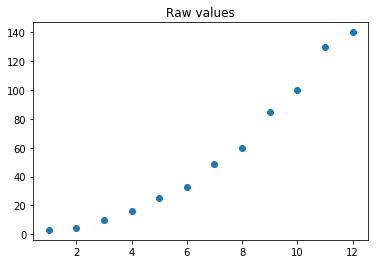

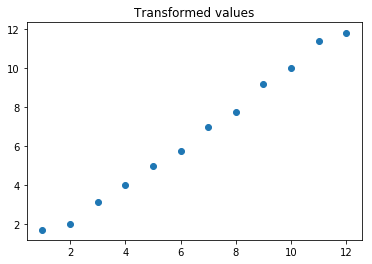

In [4]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

In [5]:
type(feature)

list

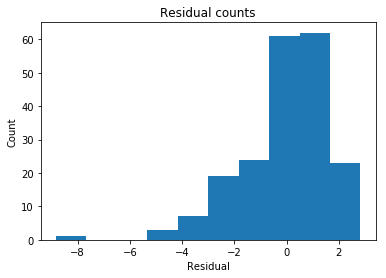

In [6]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

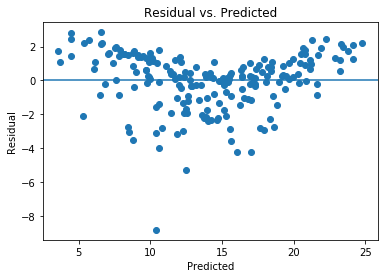

In [7]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [8]:
correlation_matrix = X.corr()
display(correlation_matrix)
# One problem is that the radio and newspaper features are highly 

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


In [9]:
# Skewedness in the residual where x is less than or equal to -3, or where there is this great a difference 
# between residual and actual sales

In [10]:
residual

0      1.576
1     -1.938
2     -3.008
3      0.902
4     -0.289
5     -5.278
6      0.070
7      1.077
8      1.073
9     -1.951
10     1.568
11     0.115
12    -1.377
13     0.874
14     0.566
15     1.581
16    -0.324
17     1.175
18     1.348
19     0.434
20    -0.101
21    -2.241
22    -0.889
23    -1.046
24     1.553
25    -3.610
26     0.010
27    -1.152
28    -0.511
29     1.356
       ...  
170    1.005
171    0.142
172   -0.008
173   -0.271
174   -2.244
175    2.213
176    0.221
177   -0.462
178   -4.211
179    0.215
180   -0.087
181   -1.728
182    2.145
183    2.067
184   -0.939
185    1.797
186    0.609
187    0.224
188   -2.744
189    0.648
190   -1.689
191    1.476
192    1.434
193    1.113
194    0.805
195    2.230
196    1.535
197    0.014
198    1.733
199   -1.773
Name: Sales, Length: 200, dtype: float64

In [11]:
actual

0     22.100
1     10.400
2      9.300
3     18.500
4     12.900
5      7.200
6     11.800
7     13.200
8      4.800
9     10.600
10     8.600
11    17.400
12     9.200
13     9.700
14    19.000
15    22.400
16    12.500
17    24.400
18    11.300
19    14.600
20    18.000
21    12.500
22     5.600
23    15.500
24     9.700
25    12.000
26    15.000
27    15.900
28    18.900
29    10.500
       ...  
170    8.400
171   14.500
172    7.600
173   11.700
174   11.500
175   27.000
176   20.200
177   11.700
178   11.800
179   12.600
180   10.500
181   12.200
182    8.700
183   26.200
184   17.600
185   22.600
186   10.300
187   17.300
188   15.900
189    6.700
190   10.800
191    9.900
192    5.900
193   19.600
194   17.300
195    7.600
196    9.700
197   12.800
198   25.500
199   13.400
Name: Sales, Length: 200, dtype: float64

In [12]:
type(predicted)

numpy.ndarray

In [13]:
residual.mean()

-1.092459456231154e-15

# Residual.mean() is almost y = 0

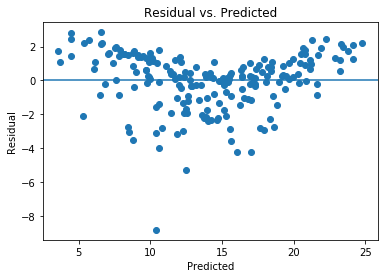

In [14]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
# plt.axhline(y=0)
plt.axhline(y = residual.mean())
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [15]:
type(residual)

pandas.core.series.Series

In [16]:
residual.describe()

count   200.000
mean     -0.000
std       1.673
min      -8.828
25%      -0.891
50%       0.242
75%       1.189
max       2.829
Name: Sales, dtype: float64

In [17]:
abs(residual)



0     1.576
1     1.938
2     3.008
3     0.902
4     0.289
5     5.278
6     0.070
7     1.077
8     1.073
9     1.951
10    1.568
11    0.115
12    1.377
13    0.874
14    0.566
15    1.581
16    0.324
17    1.175
18    1.348
19    0.434
20    0.101
21    2.241
22    0.889
23    1.046
24    1.553
25    3.610
26    0.010
27    1.152
28    0.511
29    1.356
       ... 
170   1.005
171   0.142
172   0.008
173   0.271
174   2.244
175   2.213
176   0.221
177   0.462
178   4.211
179   0.215
180   0.087
181   1.728
182   2.145
183   2.067
184   0.939
185   1.797
186   0.609
187   0.224
188   2.744
189   0.648
190   1.689
191   1.476
192   1.434
193   1.113
194   0.805
195   2.230
196   1.535
197   0.014
198   1.733
199   1.773
Name: Sales, Length: 200, dtype: float64

In [18]:
# residual['abs_diff_greater_than_2'] = np.where((abs(residual) > 2),1,0)

In [19]:
# Create a dataframe with residual values all less than 2, get rid of outliers
df = pd.DataFrame(data=residual)

In [22]:
type(df['Sales'])

pandas.core.series.Series

In [27]:
df['abs_diff_greater_than_2'] = np.where((abs(df['Sales']) > 2),1,0)
df['Actual'] = actual
df['Predicted'] = predicted

# Added feature in attempt to fix multivariate non-normality
# Residual absolute difference greater than 2- outliers?

In [28]:

df

,Sales,abs_diff_greater_than_2,Actual,Predicted
0,1.576,0,22.100,20.524
1,-1.938,0,10.400,12.338
2,-3.008,1,9.300,12.308
3,0.902,0,18.500,17.598
4,-0.289,0,12.900,13.189
5,-5.278,1,7.200,12.478
6,0.070,0,11.800,11.730
7,1.077,0,13.200,12.123
8,1.073,0,4.800,3.727
9,-1.951,0,10.600,12.551


In [31]:
# df.loc[df['column_name'] == some_value]
df_abs_res_less_than_two = df.loc[df['abs_diff_greater_than_2'] == 0]

In [35]:
df_abs_res_less_than_two

,Sales,abs_diff_greater_than_2,Actual,Predicted
0,1.576,0,22.100,20.524
1,-1.938,0,10.400,12.338
3,0.902,0,18.500,17.598
4,-0.289,0,12.900,13.189
6,0.070,0,11.800,11.730
7,1.077,0,13.200,12.123
8,1.073,0,4.800,3.727
9,-1.951,0,10.600,12.551
10,1.568,0,8.600,7.032
11,0.115,0,17.400,17.285


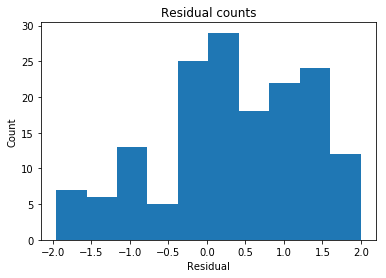

In [36]:
# Extract predicted values.
predicted = df_abs_res_less_than_two['Predicted']
actual = df_abs_res_less_than_two['Actual']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

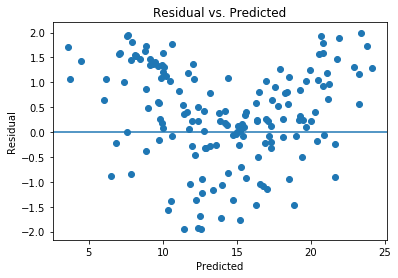

In [37]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Is the above w/ missing outliers? Next data fix addresses the normal curve...

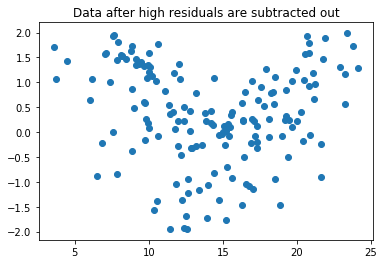

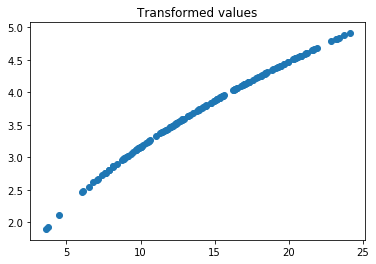

In [39]:
# Plot the data as-is. Looks a mite quadratic.
plt.scatter(predicted, residual)
plt.title('Data after high residuals are subtracted out')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in predicted]


# Well now isn't that nice.
plt.scatter(predicted, sqrt_feature)
plt.title('Transformed values')
plt.show()